# Handling Outliers and Correlation Analysis

```
Anggota Kelompok:
G1A021007 Nehemia Artah Sasta | G1A021043 Abram Dimas Hoswandi | G1A021075 Gilang Atila Ilham
Kelas : Informatika A
```






# Penjelasan Dataset
Dataset ini berisi data dari biodata kredit dari orang-orang german. Pada dataset ini, menampilkan data seperti umur, jenis kelamin, pekerjaan, saving accounts dan lain sebagainya (https://raw.githubusercontent.com/abramdh/datanarapidana/main/german_credit_data.csv) dan berasal dari Github (https://github.com/ajinkyalahade/Credit-Risk-EDA-and-Modeling./blob/master/german_credit_data.csv.).

In [12]:
#library yang digunakan untuk handling data outliers
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
#mengambil dataset dari url, serta menampilkan dataset 5 record teratas dari dataset yang telah di load
df = pd.read_csv('https://raw.githubusercontent.com/abramdh/datanarapidana/main/german_credit_data.csv')
df.head(300)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,rich,little,NaN,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951.0,48,radio/TV,bad
2,2,49,male,1,own,little,little,NaN,12,education,good
3,3,45,male,2,free,little,little,NaN,42,furniture/equipment,good
4,4,53,male,2,free,little,little,NaN,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
295,295,26,female,2,own,little,moderate,9960.0,48,furniture/equipment,bad
296,296,20,female,2,rent,NaN,NaN,4675.0,12,car,good
297,297,45,male,1,own,NaN,NaN,1287.0,10,car,good
298,298,43,male,2,own,little,NaN,2515.0,18,furniture/equipment,good


In [13]:
# Menampilkan 5 record teratas dari dataset yang telah di load
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,rich,little,NaN,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951.0,48,radio/TV,bad
2,2,49,male,1,own,little,little,NaN,12,education,good
3,3,45,male,2,free,little,little,NaN,42,furniture/equipment,good
4,4,53,male,2,free,little,little,NaN,24,car,bad


#  Mendeteksi outliers menggunakan zscores and handling outliers menggunakan median imputation
Pada code ini akan melakukan deteksi outliers menggunakan zscores pada dataset kolom latitude. Kemudian outliers akan ditangani menggunakan metode replacing outliers with median values.

In [61]:
#Deteksi outliers menggunakan zscores
df = pd.read_csv('https://raw.githubusercontent.com/abramdh/datanarapidana/main/german_credit_data.csv')
mean = np.mean(df.Duration)
std = np.std(df.Duration)
threshold = 3
outlier = []
for i in df.Duration:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [60, 60, 60, 60, 60, 60, 60, 60, 60, 72, 60, 60, 60, 60]


In [62]:
#Handling outliers menggunakan metode replacing outliers with median values
print(df['Duration'].quantile(0.10)) 
print(df['Duration'].quantile(0.90)) 
df['Duration'] = np.where(df['Duration'] > 23,61, df['Duration']) #10 dan 40 merupakan median dari persentil
df.Duration

9.0
36.0


0       6
1      61
2      12
3      61
4      61
       ..
995    12
996    61
997    12
998    61
999    61
Name: Duration, Length: 1000, dtype: int64

In [63]:
#Mengecek kembali outliers pada dataset
mean = np.mean(df.Duration)
std = np.std(df.Duration)
threshold = 3
outlier = []
for i in df.Duration:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


#  Deteksi handling outliers menggunakan scatterplot
Code melakukan detecting outliers menggunakan scatterplot pada dataset kolom Job, kemudian akan melakukan handling outliers menggunakan trimming. 

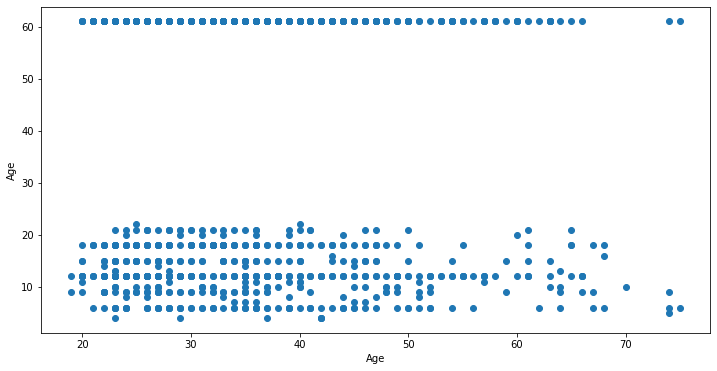

In [60]:
#Detecting outliers menggunakan scatterplot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Age'], df['Duration'])
ax.set_xlabel('Age')
ax.set_ylabel('Age')
plt.show()

# Deteksi dan Handling outliers menggunakan boxplot
Pada code ini akan menampilkan outliers dengan menggunakan boxplot pada dataset kolom longitude. Kemudian akan melakukan handling outliers dengan metode quantile based flooring and capping.

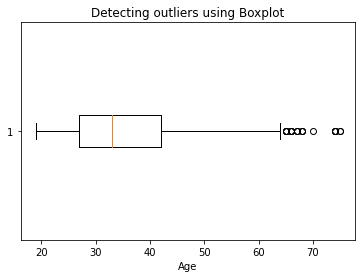

In [29]:
#Menampilkan outliers pada data dengan metode boxplot
df = pd.read_csv('https://raw.githubusercontent.com/abramdh/datanarapidana/main/german_credit_data.csv')
plt.boxplot(df.Age, vert=False)
plt.title("Mendeteksi outliers menggunakan Boxplot")
plt.xlabel('Age')
plt.show()

In [30]:
#Handling outliers dengan quantile based flooring and capping
tenth_percentile = np.percentile(df.Age, 10)
ninetieth_percentile = np.percentile(df.Age, 90)
print(tenth_percentile, ninetieth_percentile) 
a = np.where(df.Age<tenth_percentile, tenth_percentile, df.Age)
a = np.where(a>ninetieth_percentile, ninetieth_percentile, a)

23.0 52.0


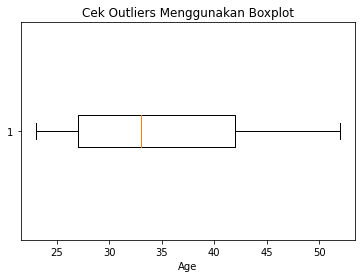

In [32]:
#Menggunakan boxplot untuk mengecek apakah masih ada outliers atau tidak
plt.boxplot(a, vert=False)
plt.title("Cek Outliers Menggunakan Boxplot")
plt.xlabel('Age')
plt.show()

# Correlation analysis
Analisis korelasi merupakan sebuah analisis yang digunakan untuk mengetahui keeratan hubungan antara beberapa variabel. Biasanya uji korelasi ini akan sangat berhubungan dengan uji regresi yang menunjukkan apakah masing-masing variabel saling mempengaruhi.

In [33]:
#Digunakan untuk mengetahui korelasi antar kolom
df.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.017925,0.030788
Age,-0.010096,1.000000,0.015673,0.035457,-0.036136
Job,-0.027345,0.015673,1.000000,0.278140,0.210910
Credit amount,0.017925,0.035457,0.278140,1.000000,0.626786
Duration,0.030788,-0.036136,0.210910,0.626786,1.000000


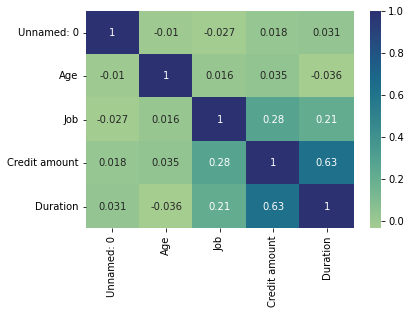

In [34]:
#menampilkan korelasi antar kolom dengan bantuan visualisasi berupa heatmap
sns.heatmap(df.corr(), cmap="crest", annot=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

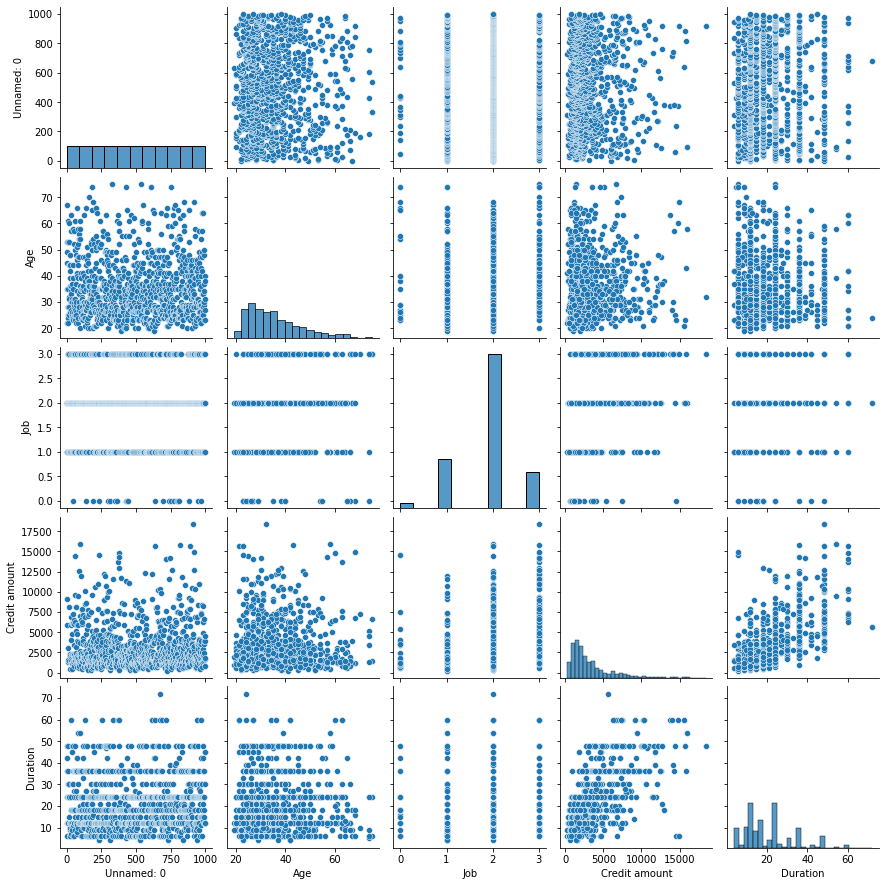

In [35]:
#menampilkan korelasi dengan pairplot
sns.pairplot(df)
plt.show

Pairplot merupakan penampilan visual korelasi data dengan berbagai jenis plot dari modul yang berbeda untuk merepresentasikan berbagai aspek kumpulan data dalam satu gambar.